# Implementation of FCM algorithm which dynamically determines the fuzzifier value

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal
from numpy.linalg import norm
import sys

## Defining the functions

In [2]:
def initializeMembershipWeights(cluster,n):
    weight = np.random.dirichlet(np.ones(cluster),n)
    weight_arr = np.array(weight)
    return weight_arr

In [3]:
def computeCentroids(weight_arr,cluster,d,df,m):
    C = []
    for i in range(cluster):
        weight_sum = np.power(weight_arr[:,i],m).sum()
        Cj = []
        for x in range(d):
          numerator = ( df.iloc[:,x].values * np.power(weight_arr[:,i],m)).sum()
          c_val = numerator/weight_sum;
          Cj.append(c_val)
        C.append(Cj)
    return C 

In [4]:
def obj_function(weight_arr,C,cluster,n,df,m):
    function_value = 0
    sumtest = 0
    for j in range(cluster):
        dist = (df.iloc[:,:].values - C[j])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        weightedsum = 0
        for i in range(n):
            squaredistance = dist[i] * dist[i]
            wid = (weight_arr[i][j]**m) * squaredistance
            weightedsum += wid
        function_value += weightedsum
    return function_value

In [5]:
def updateWeights(weight_arr,C,cluster,n,df,m):
    denom = np.zeros(n)
    for i in range(cluster):
        dist = (df.iloc[:,:].values - C[i])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        denom  = denom + np.power(1/dist,1/(m-1))

    for i in range(cluster):
        dist = (df.iloc[:,:].values - C[i])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        weight_arr[:,i] = np.divide(np.power(1/dist,1/(m-1)),denom)
    return weight_arr

In [6]:
def plotData(z,C,df):  
  plt.subplot(20,4,z+1)                                            
  plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')    
  for center in C:
    plt.scatter(center[0],center[1], marker='o',color='r')        
  plt.axis('equal')                                                                 
  plt.xlabel('a', fontsize=16)                                                 
  plt.ylabel('b', fontsize=16)                                                                                      
  plt.grid() 

In [7]:
def FuzzyMeansAlgorithm(df,cluster,m):
    n = len(df)
    col = df.columns
    d = len(col)
    e = 0.001
    weight_arr = initializeMembershipWeights(cluster,n)
    obj_value = sys.maxsize
    count = 0
    diff = sys.maxsize
    while diff > e:
        C = computeCentroids(weight_arr,cluster,d,df,m)
        obj_valuep = obj_value
        obj_value = obj_function(weight_arr, C,cluster,n,df,m)
        diff = obj_valuep - obj_value
        weight_arrp = weight_arr
        weight_arr = updateWeights(weight_arr,C,cluster,n,df,m)
        count += 1
    return (weight_arrp,C)

In [8]:
def xb_function(weight_arr,C,df,m,cluster):
    function_value = 0
    sumtest = 0
    distf = []
    n = len(df)
    for j in range(cluster):
        dist = (df.iloc[:,:].values - C[j])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        weightedsum = 0
        for i in range(n):
            wid = (weight_arr[i][j]**m) * dist[i] * dist[i]
            weightedsum += wid
        function_value += weightedsum
    numerator = function_value
    cshape = len(C)
    if cshape == 1:
        xb = 999999
    else:
        for i in range(cluster-1):
            j = i+1
            while j < cluster:
                diff = np.array(C[i]) - np.array(C[j])
                dist = norm(diff)
                squaredist = dist**2
                distf.append(squaredist)
                j = j+1
        denominator = min(distf) * n
        xb = numerator / denominator
    return xb

In [9]:
def calculate_m(k):
    m_start = (2*k - 1) / k
    mlog = math.log(49*k - 49,10)
    m_end_numa = mlog + 4
    m_end = m_end_numa / mlog
    return (m_start,m_end)

In [10]:
def fcm_clustering(cluster,interval,working_df):
    m_start,m_end = calculate_m(cluster)
    print(m_start,m_end)
    xb_m_old = sys.maxsize
    current_weights = []
    while m_start <= m_end:
        final_weights,centers = FuzzyMeansAlgorithm(working_df,cluster,m_start)
        xb_m = xb_function(final_weights,centers,working_df,m_start,cluster)
        if xb_m <= xb_m_old:
            xb_m_old = xb_m
            current_weights = final_weights
            current_centers = centers
            optimal_m = m_start
        m_start += interval
    return (xb_m_old,current_weights,current_centers,optimal_m)

## Importing the dataset

In [11]:
main_df = pd.read_csv(r"C:\Users\ASUS\Desktop\isi2\Image1(F).csv")

In [12]:
main_df

,-3.000199999999999978e+00,-3.037900000000000045e+00
0,-2.56010,-4.00340
1,-3.03620,-3.49110
2,-3.68670,-1.74540
3,-2.88520,-3.37610
4,-0.83721,-0.59433
...,...,...
9994,2.55860,4.72280
9995,1.69450,2.41420
9996,1.35490,2.95920
9997,1.85740,3.65030


<AxesSubplot:xlabel='-3.000199999999999978e+00', ylabel='-3.037900000000000045e+00'>

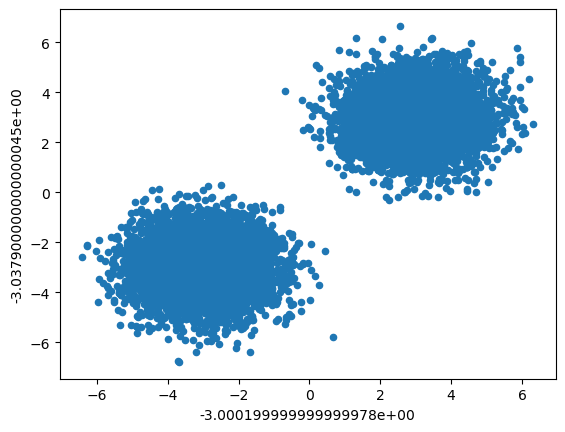

In [13]:
main_df.plot.scatter(x="-3.000199999999999978e+00",y="-3.037900000000000045e+00")

## Calling the function to perform FCM on the dataset

In [14]:
no_of_cluster = 2
interval = 0.5

In [15]:
xie_beni_value,final_weights,final_centers,optimal_fuzzifier = fcm_clustering(no_of_cluster,interval,main_df)

1.5 3.366589324909877


## Showing the results

In [16]:
xie_beni_value

0.03145193475977419

In [17]:
final_weights

array([[0.98441029, 0.01558971],
       [0.99643294, 0.00356706],
       [0.97118357, 0.02881643],
       ...,
       [0.04644561, 0.95355439],
       [0.02459122, 0.97540878],
       [0.00739408, 0.99260592]])

In [18]:
final_centers

[[-2.98451149950444, -2.9650043112127205],
 [2.9754110617594898, 2.983663750225915]]

In [19]:
optimal_fuzzifier

1.5

## This function is for display purpose

The function below assign the highest membership value of a datapoint as its class and display the output based on that

In [20]:
def show_results(weights,centers,df_result):
    total_length = len(df_result)
    X = np.zeros((total_length,1))
    plt.figure(0,figsize=(5,5))                                                     
    plt.axis('equal')                                                                 
    plt.xlabel('a', fontsize=16)                                                 
    plt.ylabel('b', fontsize=16)                                                 
    plt.title('Plot', fontsize=25,color='b')                                            
    plt.grid() 
    print(len(centers))
    for center in centers:
      plt.scatter(center[0],center[1], marker='D',color='black')                                                                
    clr = 'b'
    for i in range(total_length):    
        cNumber = np.where(weights[i] == np.amax(weights[i]))
        if cNumber[0][0]==0:
          clr = 'yellow'
        elif cNumber[0][0]==1:
          clr = 'green'
        elif cNumber[0][0]==2:
          clr = 'magenta'
        elif cNumber[0][0]==3:
          clr = 'blue'
        elif cNumber[0][0]==4:
          clr = 'red'
        elif cNumber[0][0]==5:
          clr = 'black'
        elif cNumber[0][0]==6:
          clr = 'orange'
        plt.scatter(list(df_result.iloc[i:i+1,0]), list(df_result.iloc[i:i+1,1]), alpha=0.25,s=100,color=clr)
    plt.show()

2


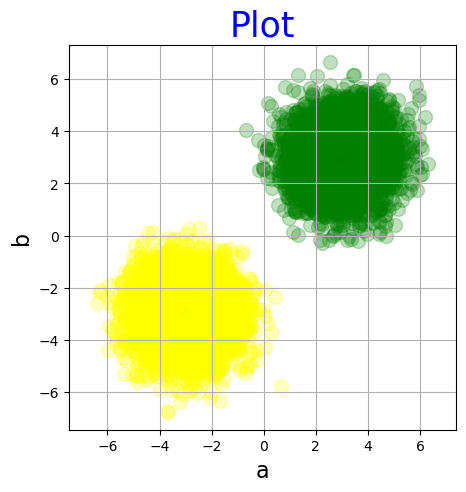

In [21]:
show_results(final_weights,final_centers,main_df)

## End of notebook